# Prática I - Redes Neurais usando Python

In [ ]:
import torch
import torch.nn as nn   #Definicao da rede neural
from torch.utils.data import Dataset, DataLoader  #utilidade para dataset

from tqdm.notebook import tqdm

from sklearn.model_selection import cross_val_score, KFold, train_test_split

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import load_iris

## Dataset e pré-processamento

Neste exemplo, iremos usar o dataset Iris. É um problema bastante conhecido na área de Ciência de Dados.
A base de dados possui 150 registros e 4 atributos, com informações de comprimento e largura de suas pétalas e sépalas. No total, temos 50 amostras para cada uma das três classes: Iris-Setosa, Iris-Verginica e Iris-Versicolor

<img src="https://www.embedded-robotics.com/wp-content/uploads/2022/01/Iris-Dataset-Classification.png"/>

Image source: https://www.embedded-robotics.com/iris-dataset-classification/

In [ ]:
data = load_iris()
X = data.data
target = data.target

Vejamos como são as entradas e saídas do modelo. O que precisa ser feito inicialmente?

In [ ]:
encoder = LabelEncoder()
y = encoder.fit_transform(target)

Precisamos também dividir a base de dados entre treinamento, validação e teste.

Usaremos a função `train_test_split` do scikit-learn

E normalizar os dados. Podemos fazer esse processo manualmente ou usando alguma função já implementada (e.g. `MinMaxScaler` do scikit-learn)

## Criando o dataset e definindo o DataLoader para o treinamento do modelo.

Para o treinamento de um modelo de Redes Neurais, precisamos definir uma estrutura de dataset para organização dos dados, amostragem de dados e outras técnicas possíveis, como data augmentation.
Também precisamos definir um DataLoader. 

Lembrete: Dependendo do tipo de problema, devemos adequar o tipo das variáveis. No exemplo abaixo, estamos adequando as variáveis X_train, X_val e X_test do tipo double para float. Em alguns casos (especialmente em problemas com múltiplas classes), temos que adequar as saídas desejadas para o tipo long.

In [ ]:
#Função necessária para criar um custom dataset no Pytorch
class CustomDataset(Dataset):
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)


## Criando um modelo de Redes Neurais

Vamos criar um objeto que irá representar o nosso modelo de Redes Neurais, que irá herdar características de `torch.nn.Module`. No `__init__` iremos definir sua arquitetura e quaisquer outras características que sejam importantes.

No forward iremos definir como ocorrerá a propagação.

In [ ]:
#Criar usando classe. 

class NeuralNetwork(torch.nn.Module):

  def __init__(self):
    pass
    
  def forward(self,x):
    pass

## Treinamento

Neste caso, definimos um loop para o treinamento por *n_epochs* épocas. Neste caso, não estamos usando o "offline learning", ensinado em sala de aula, mas sim um aprendizado em lote (batch).

## Avaliação do modelo

Vamos agora avaliar o modelo treinado. Para isso, mudamos o modelo para o modo eval. Além disso, usamos o `torch.no_grad()`, para que a execução do trecho de código tenha o autograd engine desativado. 

Lembrete: Caso queira continuar o treinamento do modelo, é necessário usar o comando `model.train()`

In [ ]:
model.eval()
with torch.no_grad():
  X_test_torch = torch.from_numpy(X_test).float()
  y_hat = model(X_test_torch)
  y_ = torch.argmax(y_hat.data,dim = 1).numpy()

## Métricas de avaliação para classificação

In [ ]:
print(classification_report(y_test, y_))

In [ ]:
cm = confusion_matrix(y_test, y_)

In [ ]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=False):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [ ]:
plot_confusion_matrix(cm, data.target_names)

# Material adicional

## Parte 1 - Construindo uma rede do zero

Redes Neurais constituem uma das técnicas mais populares de Inteligência Computacional. Por mais que esta técnica tenha um potencial para mapeamento de diversos problemas, o conceito básico sobre o seu funcionamento não é impossível de ser entendido.

Nesta primeira parte prática, iremos construir uma Rede Neural do zero. Para uma forma didática, a primeira etapa vai abordar os principais aspectos de Redes Neurais. 

Resolva primeiro a parte teórica do item para resolver em seguida a parte prática.


O esqueleto do modelo de Rede Neural já está pronto. Para uma melhor comodidade, o script já possui os métodos essenciais para o funcionamento, mas os códigos ainda não estão implementados. O objetivo deste trabalho é desenvolver o conhecimento teórico e prático sobre redes neurais, entendendo mais a fundo as suas operações.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class NeuralNetwork():
    def __init__(self,nin,nout,hidden_neurons=[2],hidden_layers=1,activation=['relu']):
        '''
        Classe para a implementação do algoritmo de Redes Neurais para a atividade prática da disciplina Inteligência Computacional Aplicada - PUC-Rio
        
        Variáveis de entrada:
        nin - Quantidade de entradas da Rede (int)
        nout - Quantidade de neurônios na saída da Rede (int)
        hidden_neurons - Quantidade de neurônios na camada escondida. Deve ser uma lista de inteiros positivos.
        hidden_layers - Quantidade de camadas escondidas. (int)
        activation - Função de ativação para cada uma das camadas. Deve ser uma lista de strings.
        
        '''
        
        #Entrada do modelo
        self.input = nin 
        #Saída do modelo
        self.output = nout 
        #Lista de neurônios. Começa a contagem da entrada do modelo.
        self.hn = [nin] + hidden_neurons 
        
        self.hl = hidden_layers

        #Dicionário com todas as possíveis funções de ativação. Caso construa alguma outra, adicione a esta lista.
        self.possible_activations = {'relu':self.relu, 'tanh':np.tanh, 'sigmoid':self.sigmoid}

        #Inicialização dos pesos ao criar o novo objeto
        self.initialize_weights(activation)




    def initialize_weights(self,activation):

        #Matriz de pesos 
        self.weights = dict()
        #Vetor de bias
        self.bias = dict()

        #Erros
        self.weights_error = dict()
        self.bias_error = dict()

        #Ativacao do neuronio
        self.neuron_out = dict()
        
        
        self.neuron_net = dict()

        self.activation = dict()




        for i in range(self.hl):
            name = f'hidden{i}'

            self.weights[name] = np.random.rand(self.hn[i+1], self.hn[i])*2 - 1.0
            self.bias[name] = np.zeros((self.hn[i+1],1))

            self.weights_error[name] = np.zeros((self.hn[i+1], self.hn[i]))
            self.bias_error[name] = np.zeros((self.hn[i+1],1))

            self.activation[name] = self.possible_activations[activation[i]]

            self.neuron_out[name] = np.zeros((self.hn[i+1],1))
            self.neuron_net[name] = np.zeros((self.hn[i], 1))


        self.weights['output'] = np.random.rand(self.output, self.hn[-1])*2 - 1.0
        self.bias['output'] = np.zeros((self.output, 1))

        self.weights_error['output'] = np.zeros((self.output, self.hn[-1]))
        self.bias_error['output'] = np.zeros((self.output,1))

        self.activation['output'] = self.possible_activations[activation[-1]]

        self.neuron_out['output'] = np.zeros((self.output,1))

        self.neuron_net['output'] = np.zeros((self.hn[-1],1))

    def insert_layers(self,weights=[],bias=[]):
        '''
        Função para inserção manual dos pesos. 
        '''
        self.weights = weights
        self.bias = bias 

    def neuron_process(self,x=[],weights=[],bias=[]):
        '''
        Função para regra de propagação
        #NOTE
        Etapa 1
        '''
        return None


    def forward(self,x):
        '''
        Função para etapa feedforward
        #NOTE
        Etapa 3
        '''
        input_values = x
        for layer in self.weights:
            pass
            
        return None


    def backward(self,lr,y):
        '''
        Função para a etapa feedback
        '''
        for layer in reversed(self.weights):

            if layer == 'output':
                dZ2 = y - self.neuron_out[layer]
                dW2 = np.dot(dZ2, self.neuron_net[layer].T)
                db2 = np.sum(dZ2, axis=1, keepdims=True)
                self.weights_error[layer] = lr * dW2 
                self.bias_error[layer] = lr * db2 
                prev_weights = self.weights[layer]
            else:
                dZ1 = np.multiply(np.dot(prev_weights.T, dZ2), 1-np.power(self.neuron_out[layer], 2))
                dW1 = np.dot(dZ1, self.neuron_net[layer].T)
                db1 = np.sum(dZ1, axis=1, keepdims=True)
                self.weights_error[layer] = lr * dW1 
                self.bias_error[layer] = lr * db1 

                prev_weights = self.weights[layer]
                dZ2 = np.copy(dZ1)
            

    def update_weights(self):
        '''
        Função para atualização dos pesos
        #NOTE
        Etapa 5
        '''
        for layer in self.weights:

            assert(self.weights[layer].shape == self.weights_error[layer].shape), f"Dimension mismatch: {self.weights[layer].shape} and {self.weights_error[layer].shape}"
            self.weights[layer] = self.weights[layer] + self.weights_error[layer]

            assert(self.bias[layer].shape == self.bias_error[layer].shape), f"Dimension mismatch: {self.bias[layer].shape} and {self.bias_error[layer].shape}"
            self.bias[layer] = self.bias[layer] + self.bias_error[layer]
            self.weights_error[layer] = np.zeros(self.weights_error[layer].shape)
            self.bias_error[layer] = np.zeros(self.bias_error[layer].shape)

    def train(self,x,y,epochs=100,lr=0.5):
        '''
        Função para treinamento da rede
        # NOTE
        Etapa 6
        '''
        for epoch in range(epochs):
            pass


    @staticmethod
    def sigmoid(x):
        '''
        Definição da função sigmoide. Retorna o valor 1/(1 + e^(-x))
        #NOTE
        Etapa 2
        '''
        
        return None

    
    def sigmoid_derivative(self,value):
        '''
        ???
        '''
        return self.sigmoid(value)*(1-self.sigmoid(value))

    @staticmethod
    def relu(x):
        return np.maximum(np.zeros(x.shape),x)

    @staticmethod 
    def relu_derivative(x):
        return np.ones(x.shape)

### Questão 1
O neurônio é a unidade básica de uma Rede Neural. Na primeira etapa, desenvolva dentro da função **neuron_process** para o cálculo de processamento do neurônio. Não esqueça que a função recebe como argumento a matriz de pesos **weights**, a entrada **x** e o bias **bias**.

Ao terminar de implementar a função, valide seu código com os testes abaixo. **Não** prossiga para o próximo item enquanto houver erro no resultado.

In [ ]:
nn_test = NeuralNetwork(2,1,hidden_layers=1,hidden_neurons=[4],activation=['tanh','sigmoid'])

In [ ]:
x = np.array([[0],[0]])
weights = np.array([[ 3.14708825, -3.02515284],[-3.48236268,  3.60001384]])
bias = np.array([[1.43813902],[1.67767442]])

nn_test.neuron_process(x=x,weights=weights,bias=bias)

array([[1.43813902],
       [1.67767442]])

### Questão 2
Com a código de processamento do neurônio já criado, é preciso desenvolver um método para a função de ativação não-linear. 
Desenvolva a equação que representa a ativação sigmoide e sua respectiva derivada. Para validar o funcionamento, além de realizar os testes padrões estipulados abaixo, verifique graficamente se as funções estão de acordo com o esperado.

In [ ]:
t = np.linspace(-10,10,100)

Text(0, 0.5, 'sigm(x)')

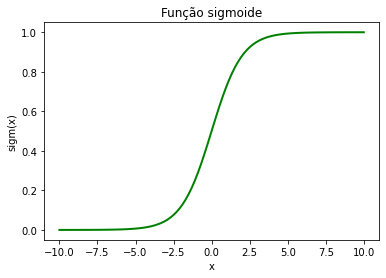

In [ ]:
plt.plot(t,nn_test.sigmoid(t),linewidth=2,color='g')
plt.title('Função sigmoide')
plt.xlabel('x')
plt.ylabel('sigm(x)')

### Etapa III - Feedforward

### Etapa IV - Retropropagação dos erros

### Etapa V - Atualização dos pesos

### Etapa VI - Treinamento do modelo

In [ ]:
X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]])
Y = np.array([[0, 1, 1, 0]])

#X = np.array([[0,0],[0,1],[1,0],[1,1]])
#Y = np.array([[0],[1],[1],[0]])

nn_test.train(X,Y,epochs=1500,lr=0.2)

### Etapa VII - Generalização

In [ ]:
X_test = np.array([[0],[0]])
print(nn_test.forward(X_test))

X_test = np.array([[0],[1]])
print(nn_test.forward(X_test))

X_test = np.array([[1],[0]])
print(nn_test.forward(X_test))

X_test = np.array([[1],[1]])
print(nn_test.forward(X_test))

[[0.00030853]]
[[0.99744658]]
[[0.99772362]]
[[0.0030284]]


In [ ]:
nn_test.bias

{'hidden0': array([[-0.93541997],
        [-0.30522097],
        [ 1.12782389],
        [-0.32628317]]),
 'output': array([[2.37573173]])}

In [ ]:
manual_weights = dict()
manual_bias = dict()
manual_weights['hidden0'] = np.array([[ 3.14708825, -3.02515284],
        [-3.48236268,  3.60001384]])
manual_weights['output'] = np.array([[-5.07678577, -5.01607987]])

manual_bias['hidden0'] = np.array([[1.43813902],
        [1.67767442]])
manual_bias['output'] = np.array([[4.49745273]])

nn_test.insert_layers(weights=manual_weights,bias=manual_bias)

In [ ]:
nn_test.weights

{'hidden0': array([[ 3.14708825, -3.02515284],
        [-3.48236268,  3.60001384]]),
 'output': array([[-5.07678577, -5.01607987]])}

In [ ]:
nn_test.neuron_out

{'hidden0': array([[-0.97217686],
        [ 0.99980005],
        [ 0.97393905],
        [ 0.53319081]]),
 'output': array([[0.0030284]])}

## Parte 2 - Framework para Redes Neurais


In [33]:
import torch 
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader 

from tqdm.notebook import tqdm

from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.datasets import load_iris

In [34]:
#Função necessária para criar um custom dataset no Pytorch

class CustomDataset(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)


In [35]:
data = load_iris()

In [36]:
X = data.data
target = data.target

In [37]:
encoder = LabelEncoder()
y = encoder.fit_transform(target)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=42)

In [39]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [40]:
train_dataset = CustomDataset(torch.from_numpy(X_train), torch.from_numpy(y_train))
val_dataset = CustomDataset(torch.from_numpy(X_val), torch.from_numpy(y_val))
test_dataset = CustomDataset(torch.from_numpy(X_test), torch.from_numpy(y_test))

In [41]:
#@title Definindo dataloader
batch_size = 16 #@param {type:"integer"}

#Gerando um dataloader
train_loader = DataLoader(dataset=train_dataset,batch_size=batch_size)
val_loader = DataLoader(dataset=val_dataset, batch_size=1)
test_loader = DataLoader(dataset=test_dataset, batch_size=1)

Temos algumas formas para criar um modelo de Redes Neurais em Pytorch.

In [42]:
#@title Criando uma Rede Neural usando classe.
#Criar usando classe. 

class NeuralNetwork(torch.nn.Module):

  def __init__(self,hidden_neurons = 4, hidden_activation = 'relu', output_activation='softmax', lr = 0.05, n_input = 1, n_output = 1):
    # create model
    super(NeuralNetwork, self).__init__()

    self.activations = {'relu': nn.ReLU(), 'sigmoid':nn.Sigmoid(), 'softmax':nn.Softmax()}

    self.fc1 = nn.Linear(n_input, hidden_neurons)
    self.ha = self.activations[hidden_activation]
    self.fc2 = nn.Linear(hidden_neurons, n_output)
    #self.out = self.activations[output_activation]

  def forward(self,x):
    h = self.fc1(x)
    h1 = self.ha(h) 
    y = self.fc2(h1) 
    #y = self.out(h2)
    return y

In [43]:
model = NeuralNetwork(hidden_neurons=5, n_input=4, n_output=3)

In [44]:
#@title Definindo parâmetros do problema.
lr = 10e-4 #@param {type:"number"}
device = 'cuda' #@param {type:"string"}

In [45]:
#@title Definindo a função de perda e o método de otimização para atualização dos pesos.


criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

history = {'acc_train' : [], 'loss_train': [], 'acc_val': [], 'loss_val': []}

In [50]:
n_epochs=1000
loss_list=[]

#n_epochs
for epoch in range(n_epochs):
    for x, y in train_loader:
      

        optimizer.zero_grad()
        y_hat = model(x.float())
        loss = criterion(y_hat,y)
        loss.backward()
        optimizer.step()
        
        loss_list.append(loss.data)
        
        
    print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 0, loss 0.6547568440437317
epoch 1, loss 0.651190996170044
epoch 2, loss 0.6476939916610718
epoch 3, loss 0.6442641615867615
epoch 4, loss 0.640899658203125
epoch 5, loss 0.6375982165336609
epoch 6, loss 0.6344050168991089
epoch 7, loss 0.6313188076019287
epoch 8, loss 0.6283477544784546
epoch 9, loss 0.6254609823226929
epoch 10, loss 0.6226517558097839
epoch 11, loss 0.6198490858078003
epoch 12, loss 0.6170814037322998
epoch 13, loss 0.6143965721130371
epoch 14, loss 0.6117745041847229
epoch 15, loss 0.6092046499252319
epoch 16, loss 0.6066827774047852
epoch 17, loss 0.6042057275772095
epoch 18, loss 0.6017715334892273
epoch 19, loss 0.5993779897689819
epoch 20, loss 0.5970234870910645
epoch 21, loss 0.5947062969207764
epoch 22, loss 0.5924239158630371
epoch 23, loss 0.5901739597320557
epoch 24, loss 0.5879561305046082
epoch 25, loss 0.5857672095298767
epoch 26, loss 0.5836063623428345
epoch 27, loss 0.5814740657806396
epoch 28, loss 0.5793695449829102
epoch 29, loss 0.577291548

array([2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 0, 2, 0, 1, 0, 0])

In [55]:
model.eval()

NeuralNetwork(
  (fc1): Linear(in_features=4, out_features=5, bias=True)
  (ha): ReLU()
  (fc2): Linear(in_features=5, out_features=3, bias=True)
)

In [57]:
y_hat = model(torch.from_numpy(X_train).float())
y_ = torch.argmax(y_hat.data,1).numpy()

array([[32,  0,  0],
       [ 0, 29,  1],
       [ 0,  0, 34]])

In [ ]:
#@title Forma "elegante" para mostrar a evolução do treinamento.

epochs = 50
for e in tqdm(range(1, epochs+1)):
  
  y_hat = np.array([])

  train_epoch_loss = 0
  train_epoch_acc = 0
  model.train()
  for X_train_batch, y_train_batch in train_loader:
      X, y = X_train_batch.to(device), y_train_batch.to(device)
      optimizer.zero_grad()
      
      y_pred = model(X)
      
      loss = criterion(y_pred, y)
      acc = accuracy(y_pred, y)
      
      loss.backward()
      optimizer.step()
      
      train_epoch_loss += loss.item()
      train_epoch_acc += acc.item()
      y_p = torch.argmax(y_pred, dim=1)
      y_hat = np.concatenate((y_hat, y_p))
  
  _, val_loss, val_acc = evaluate(model, val_loader, criterion, device, binary=binary)

  history['acc_train'].append(train_epoch_acc)
  history['loss_train'].append(train_epoch_loss)
  history['acc_val'].append(val_acc)
  history['loss_val'].append(val_loss)
  
  print(f'Epoch {e+0:03}: | Train Loss: {train_epoch_loss/len(train_loader):.3f} | Val Loss: {val_loss/len(val_loader):.4f} | Train Acc: {train_epoch_acc/len(train_loader):.4f}| Val Acc: {val_acc/len(val_loader):.4f}')


In [ ]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from tensorflow.keras.optimizers import Adam

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras.datasets import mnist

from tensorflow.keras.utils import to_categorical

import seaborn as sns 


In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data(path="mnist.npz")

flatten_x_train = x_train.reshape(-1,28*28)
flatten_x_test = x_test.reshape(-1,28*28)

norm_x_train = flatten_x_train/255.0
norm_x_test = flatten_x_test/255.0

In [ ]:
encoder = LabelEncoder()
encoder.fit(y_train)
encoded_Yt = encoder.transform(y_train)

encoded_Ytst = encoder.transform(y_test)

encoded_y_train = to_categorical(encoded_Yt)
encoded_y_test = to_categorical(encoded_Ytst)

In [ ]:
n_input = flatten_x_train.shape[1]
n_output = encoded_y_train.shape[1]

In [ ]:
def create_model(hidden_neurons = [4], hidden_activation = ['relu'], output_activation='softmax',lr=0.05):
    # create model
    model = Sequential()
    model.add(Dense(hidden_neurons[0], input_dim=n_input, activation='relu'))
    for i in range(1,len(hidden_neurons)):
        model.add(Dense(hidden_neurons[i], input_dim=hidden_neurons[i-1], activation='relu'))
        

    model.add(Dense(n_output, activation=output_activation))
    # Compile model
    opt = Adam(lr=lr)
    model.compile(
                    optimizer=tf.keras.optimizers.Adam(0.001),
                    loss=tf.keras.losses.CategoricalCrossentropy(),
                    metrics=[tf.keras.metrics.CategoricalAccuracy()])
    return model

In [ ]:
model = create_model(hidden_neurons=[80],lr=0.1)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 80)                62800     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                810       
Total params: 63,610
Trainable params: 63,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x=norm_x_train,y=encoded_y_train,epochs=60,validation_split=0.2)

Epoch 1/60
1500/1500 [==============================] - 1s 774us/step - loss: 0.3212 - categorical_accuracy: 0.9110 - val_loss: 0.1830 - val_categorical_accuracy: 0.9463
Epoch 2/60
1500/1500 [==============================] - 1s 695us/step - loss: 0.1567 - categorical_accuracy: 0.9538 - val_loss: 0.1420 - val_categorical_accuracy: 0.9587
Epoch 3/60
1500/1500 [==============================] - 1s 674us/step - loss: 0.1109 - categorical_accuracy: 0.9671 - val_loss: 0.1181 - val_categorical_accuracy: 0.9663
Epoch 4/60
1500/1500 [==============================] - 1s 674us/step - loss: 0.0849 - categorical_accuracy: 0.9753 - val_loss: 0.1099 - val_categorical_accuracy: 0.9673
Epoch 5/60
1500/1500 [==============================] - 1s 674us/step - loss: 0.0685 - categorical_accuracy: 0.9794 - val_loss: 0.1075 - val_categorical_accuracy: 0.9678
Epoch 6/60
1500/1500 [==============================] - 1s 669us/step - loss: 0.0555 - categorical_accuracy: 0.9827 - val_loss: 0.0959 - val_categoric

Epoch 49/60
1500/1500 [==============================] - 1s 676us/step - loss: 0.0025 - categorical_accuracy: 0.9993 - val_loss: 0.1747 - val_categorical_accuracy: 0.9749
Epoch 50/60
1500/1500 [==============================] - 1s 677us/step - loss: 0.0024 - categorical_accuracy: 0.9993 - val_loss: 0.1810 - val_categorical_accuracy: 0.9748
Epoch 51/60
1500/1500 [==============================] - 1s 673us/step - loss: 0.0018 - categorical_accuracy: 0.9995 - val_loss: 0.1995 - val_categorical_accuracy: 0.9725
Epoch 52/60
1500/1500 [==============================] - 1s 674us/step - loss: 0.0036 - categorical_accuracy: 0.9987 - val_loss: 0.2117 - val_categorical_accuracy: 0.9709
Epoch 53/60
1500/1500 [==============================] - 1s 679us/step - loss: 0.0020 - categorical_accuracy: 0.9994 - val_loss: 0.1806 - val_categorical_accuracy: 0.9747
Epoch 54/60
1500/1500 [==============================] - 1s 669us/step - loss: 1.2107e-04 - categorical_accuracy: 1.0000 - val_loss: 0.1712 - val

In [ ]:
Y_pred = model.predict(norm_x_test)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print('Classification Report')
target_names = ['0','1','2','3','4','5','6','7','8','9']
print(classification_report(y_test, y_pred, target_names=target_names))

Confusion Matrix
[[ 964    0    5    1    0    0    5    1    4    0]
 [   0 1122    4    2    0    0    3    1    3    0]
 [   3    1 1004    4    2    0    3    3   12    0]
 [   0    0    4  995    0    3    0    2    2    4]
 [   3    0    4    1  948    0    5    5    1   15]
 [   2    1    1   15    2  859    6    0    4    2]
 [   4    4    3    1    3    3  940    0    0    0]
 [   1    4   11    5    1    0    0  985   13    8]
 [   1    0    7    9    5    1    2    2  943    4]
 [   4    4    0   10    4    3    0    2    2  980]]
Classification Report
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.95      0.99      0.97      1010
           4       0.98      0.97      0.97       982
           5       0.99      0.96      0.98       892
           6       0.98      0.98      0.98       9

Text(0.5, 123.0, 'Predicted')

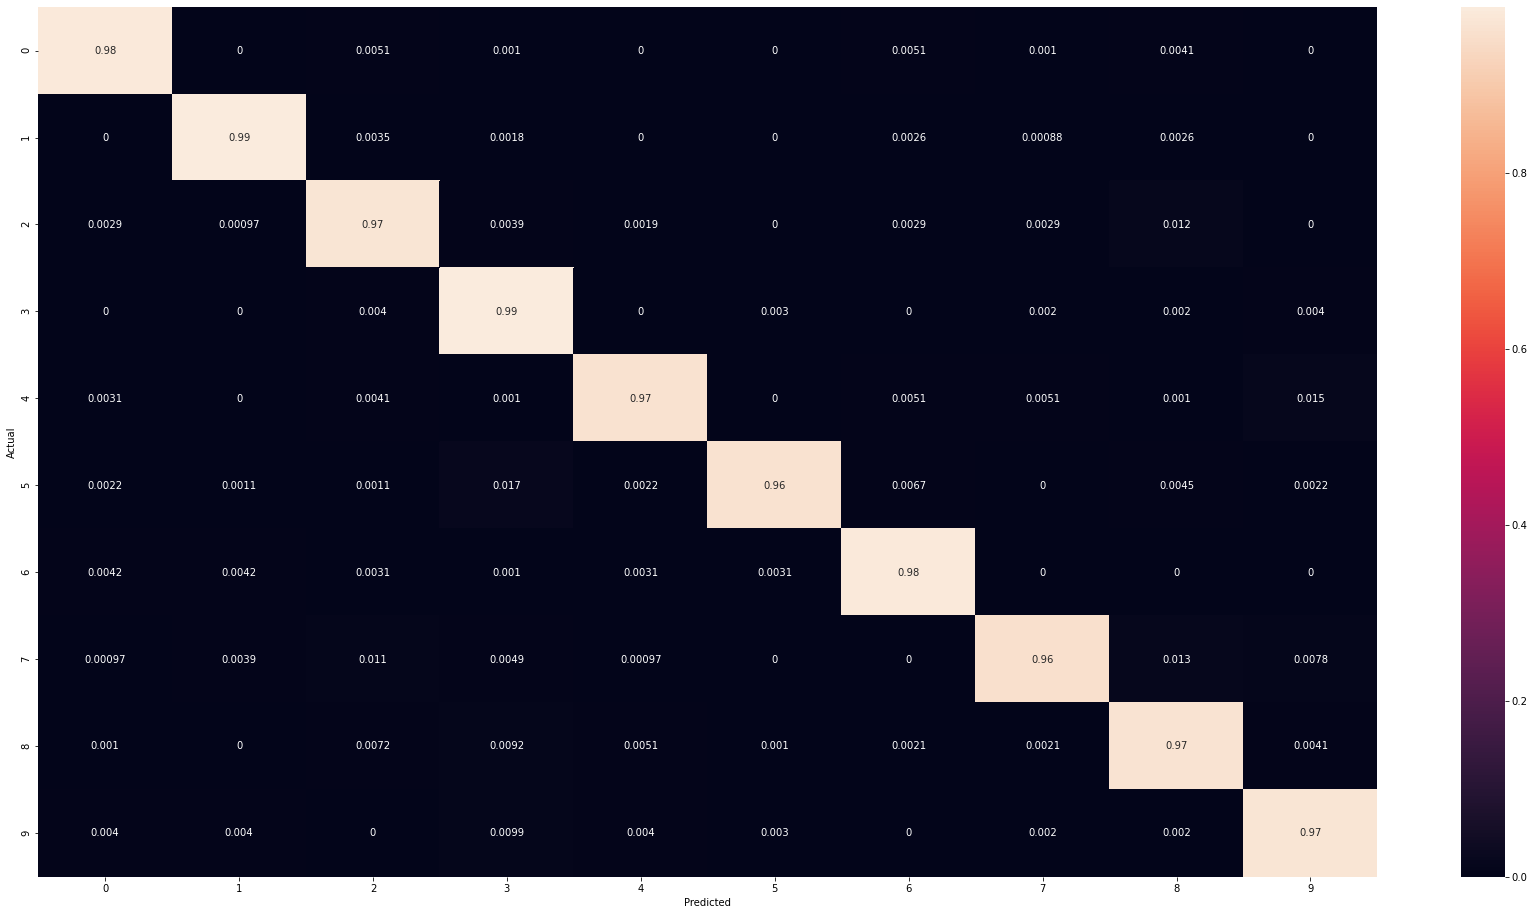

In [ ]:
plt.figure(figsize=(30,16))
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cmn,annot=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')